In [1]:
import sys
sys.path.append("../")

from smc.sampler import SMCsampler
from smc.prior import CatalogPrior
from smc.images import ImageAttributes

import torch
# torch.cuda.is_available()
device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
torch.set_default_device(device)

import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
num_images = 1
img_dim = 16 # Needs to be square for now
img_width = img_dim
img_height = img_dim
max_objects = 8
psf_stdev = 3.25
background_intensity = 19200

prior = CatalogPrior(max_objects = max_objects,
                     img_height = img_height,
                     img_width = img_width,
                     min_flux = background_intensity/3.)

image_attributes = ImageAttributes(img_height = img_height,
                                   img_width = img_width,
                                   max_objects = max_objects,
                                   psf_stdev = psf_stdev,
                                   background_intensity = background_intensity)

true_counts, true_fluxes, true_locs, true_total_intensities, images = image_attributes.generate(prior, num_images)

In [3]:
for i in range(num_images):
    print(f"image {i+1}",
          "\ncount\n", true_counts[i].round().item(),
          "\ntotal flux\n", true_fluxes[i].sum().item(),
          "\nloc\n", true_locs[i].cpu().numpy(), "\n\n")

image 1 
count
 6 
total flux
 370135.28125 
loc
 [[ 0.9523412  8.561985 ]
 [11.69315   11.314336 ]
 [14.002481  13.3920765]
 [ 2.2978427  2.646015 ]
 [15.840272  15.847098 ]
 [13.371125   5.784336 ]
 [ 0.         0.       ]
 [ 0.         0.       ]] 




True count: 6
True total flux: 370135.28125
Starting the sampler...
iteration 5, temperature = 0.0015024291351437569, posterior mean count = 5.698089599609375
iteration 10, temperature = 0.004730993881821632, posterior mean count = 5.834558963775635
iteration 15, temperature = 0.011188908480107784, posterior mean count = 5.91513729095459
iteration 20, temperature = 0.024712031707167625, posterior mean count = 5.912128448486328
iteration 25, temperature = 0.05171557143330574, posterior mean count = 5.894503593444824
iteration 30, temperature = 0.10408830642700195, posterior mean count = 5.92924690246582
iteration 35, temperature = 0.1840170919895172, posterior mean count = 5.9488091468811035
iteration 40, temperature = 0.29570823907852173, posterior mean count = 5.982973575592041
iteration 45, temperature = 0.44336479902267456, posterior mean count = 6.001395225524902
iteration 50, temperature = 0.6437064409255981, posterior mean count = 6.024298667907715
iteration 55, temperature = 0.9

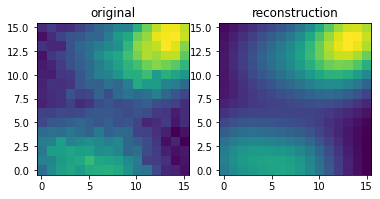

In [4]:
max_objects_smc = max_objects + 2
pad = 0
prior = CatalogPrior(max_objects_smc, img_width, img_height, background_intensity/3., pad)
smc = SMCsampler(images[0], image_attributes, prior,
                 max_objects = max_objects_smc, catalogs_per_block = 10000,
                 kernel_num_iters = 100,
                 max_smc_iters = 500,
                 wastefree = True, wastefree_M = 80)

print(f"True count: {true_counts[0]}")
print(f"True total flux: {true_fluxes[0].sum()}")

smc.run(print_progress = True)
smc.summarize()